In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import rioxarray as rxr
from pyproj import Proj, Transformer, CRS

import cmocean.cm as cmo
import seaborn as sns
sns.set(font='Franklin Gothic Book',
        rc={
         'axes.axisbelow': False,
         'axes.edgecolor': 'Black',
         'axes.facecolor': 'lightgrey',
         'axes.grid': False,
         'axes.labelcolor': 'darkgrey',
         'axes.spines.right': True,
         'axes.spines.top': True,
         'figure.facecolor': 'white',
         'lines.solid_capstyle': 'round',
         'patch.edgecolor': 'k',
         'patch.force_edgecolor': True,
         'text.color': 'dimgrey',
         'xtick.bottom': False,
         'xtick.color': 'dimgrey',
         'xtick.direction': 'out',
         'xtick.top': False,
         'ytick.color': 'dimgrey',
         'ytick.direction': 'out',
         'ytick.left': False,
         'ytick.right': False},
         font_scale=1)

In [2]:
from glob import glob
files = glob('*.tif')
print(files)

['grid_1km_no3_byq.tif', 'grid_1km_SPM_byq.tif', 'grid_1km_thetao_byq.tif', 'grid_1km_tropicalLimit_byq.tif', 'grid_1km_upwelling_byq.tif', 'grid_1km_v01.1.tif', 'grid_1km_warming_byq.tif', 'grid_1km_WGS84nodefs.tif']


In [ ]:
for file in files:
    print(file)
    ## LOAD GRID AND GET COORDINATE LOCATIONS
    grid1km = rxr.open_rasterio(file, masked=True)

    grid_lon, grid_lat = np.meshgrid(grid1km.x.values,grid1km.y.values)

    crs = CRS.from_proj4(grid1km.rio.crs.to_proj4())
    proj = Transformer.from_crs(crs, crs.geodetic_crs)

    grid_lon, grid_lat = proj.transform(grid_lon,grid_lat)

    plt.figure(figsize=(18,15))
    # plt.contourf(grid_lon,grid_lat,np.squeeze(grid1km.values),100,cmap=cmo.balance)
    plt.pcolormesh(grid_lon,grid_lat,np.squeeze(grid1km.values),cmap=cmo.balance)
    plt.annotate(file, xy=(10,10))
    plt.colorbar()
    plt.savefig(file+'.png', bbox_inches='tight')

grid_1km_no3_byq.tif
grid_1km_SPM_byq.tif
grid_1km_thetao_byq.tif
grid_1km_tropicalLimit_byq.tif
grid_1km_upwelling_byq.tif
grid_1km_v01.1.tif
grid_1km_warming_byq.tif
grid_1km_WGS84nodefs.tif


D:\miniconda3\envs\py3.10\lib\site-packages\pyproj\crs\crs.py:399: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return cls.from_user_input(_prepare_from_proj_string(in_proj_string))
D:\miniconda3\envs\py3.10\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


C:\Users\bastien\AppData\Local\Temp\ipykernel_23156\2534573254.py:5: RuntimeWarning: divide by zero encountered in power
  field = np.stack((-2 * x**2* y, x ** 2 + 2 * y**-3 - 4))
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:1069: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:1090: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:1097: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_n


(11, 11)

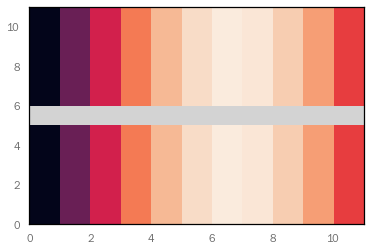

In [17]:
shape = 11, 11
dims = len(shape)
domain = -2, 2
x, y = np.meshgrid(*(np.linspace(*domain, num=d) for d in shape))
field = np.stack((-2 * x**2* y, x ** 2 + 2 * y**-3 - 4))

# Compute jacobian using NumPy's gradient function.
partials = tuple(np.gradient(i) for i in field)
jacobian = np.stack(partials).reshape(*(j := (dims,) * 2), *shape)

# Extract divergence and curl from jacobian.
divergence = np.trace(jacobian)

plt.pcolormesh(divergence)

np.shape(divergence)
